In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stud_df=pd.read_csv('student-data.csv')

In [3]:
stud_df.shape

(395, 31)

In [4]:
stud_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [5]:
stud_df.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
390,MS,M,20,U,LE3,A,2,2,services,services,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,1,1,other,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,no,4,4,1,3,4,5,0,yes
394,MS,M,19,U,LE3,T,1,1,other,at_home,...,yes,no,3,2,3,3,3,5,5,no


In [6]:
#Missing Values

In [7]:
stud_df.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [8]:
#Preprocessing

In [9]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [10]:
stud_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed'],
      dtype='object')

In [11]:
stud_df.drop(['Fedu','Medu'],axis=1)

,school,sex,age,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,at_home,teacher,course,mother,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,at_home,other,course,father,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,at_home,other,other,mother,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,health,services,home,mother,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,other,other,home,father,...,no,no,4,3,2,1,2,5,4,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,services,services,course,other,...,no,no,5,5,4,4,5,4,11,no
391,MS,M,17,U,LE3,T,services,services,course,mother,...,yes,no,2,4,5,3,4,2,3,yes
392,MS,M,21,R,GT3,T,other,other,course,other,...,no,no,5,5,3,3,3,3,3,no
393,MS,M,18,R,LE3,T,services,other,course,mother,...,yes,no,4,4,1,3,4,5,0,yes


# Adding new features

In [12]:
stud_df['Alcohol'] = stud_df['Walc'] + stud_df['Dalc']
stud_df.drop(['Walc','Dalc'],axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,famrel,freetime,goout,health,absences,passed,Alcohol
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,3,4,3,6,no,2
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,5,3,3,3,4,no,2
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,4,3,2,3,10,yes,5
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,3,2,2,5,2,yes,2
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,4,3,2,5,4,yes,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,yes,no,no,5,5,4,4,11,no,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,yes,yes,no,2,4,5,2,3,yes,7
392,MS,M,21,R,GT3,T,1,1,other,other,...,yes,no,no,5,5,3,3,3,no,6
393,MS,M,18,R,LE3,T,3,2,services,other,...,yes,yes,no,4,4,1,5,0,yes,7


# Label Encoding.

In [13]:
from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
labels=['school', 'sex','address', 'famsize', 'Pstatus','Mjob', 'Fjob', 'reason', 'guardian','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic','passed']

In [14]:
for i in np.arange(len(labels)):
    stud_df[labels[i]]=label_en.fit_transform(stud_df[labels[i]])

In [15]:
stud_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed,Alcohol
0,0,0,18,1,0,0,4,4,0,4,...,0,4,3,4,1,1,3,6,0,2
1,0,0,17,1,0,1,1,1,0,2,...,0,5,3,3,1,1,3,4,0,2
2,0,0,15,1,1,1,1,1,0,2,...,0,4,3,2,2,3,3,10,1,5
3,0,0,15,1,0,1,4,2,1,3,...,1,3,2,2,1,1,5,2,1,2
4,0,0,16,1,0,1,3,3,2,2,...,0,4,3,2,1,2,5,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,0,5,5,4,4,5,4,11,0,9
391,1,1,17,1,1,1,3,1,3,3,...,0,2,4,5,3,4,2,3,1,7
392,1,1,21,0,0,1,1,1,2,2,...,0,5,5,3,3,3,3,3,0,6
393,1,1,18,0,1,1,3,2,3,2,...,0,4,4,1,3,4,5,0,1,7


In [16]:
#Now after label encoding adding creating new features

In [17]:
stud_df['support'] = stud_df['famsup'] + stud_df['schoolsup']

In [18]:
stud_df.drop(['famsup','schoolsup'],axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,passed,Alcohol,support
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,0,2,1
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,0,2,1
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,1,5,1
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,1,2,1
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,0,9,1
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,1,7,0
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,0,6,0
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,1,7,0


In [19]:
stud_df['Parjob'] = stud_df['Mjob'] + stud_df['Fjob']

In [20]:
stud_df.drop(['Mjob','Fjob'],axis=1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,reason,guardian,...,freetime,goout,Dalc,Walc,health,absences,passed,Alcohol,support,Parjob
0,0,0,18,1,0,0,4,4,0,1,...,3,4,1,1,3,6,0,2,1,4
1,0,0,17,1,0,1,1,1,0,0,...,3,3,1,1,3,4,0,2,1,2
2,0,0,15,1,1,1,1,1,2,1,...,3,2,2,3,3,10,1,5,1,2
3,0,0,15,1,0,1,4,2,1,1,...,2,2,1,1,5,2,1,2,1,4
4,0,0,16,1,0,1,3,3,1,0,...,3,2,1,2,5,4,1,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,0,2,...,5,4,4,5,4,11,0,9,1,6
391,1,1,17,1,1,1,3,1,0,1,...,4,5,3,4,2,3,1,7,0,6
392,1,1,21,0,0,1,1,1,0,2,...,5,3,3,3,3,3,0,6,0,4
393,1,1,18,0,1,1,3,2,0,1,...,4,1,3,4,5,0,1,7,0,5


In [21]:
#Splitting

In [22]:
x= stud_df.drop(['passed'],axis=1)
y= stud_df['passed']
from sklearn.model_selection import train_test_split
x_train, x_test , y_train, y_test = train_test_split(x, y, random_state=42, test_size = 0.2)

In [23]:
x

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,Alcohol,support,Parjob
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,6,2,1,4
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,4,2,1,2
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,10,5,1,2
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,2,2,1,4
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,4,3,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,1,1,20,1,1,0,2,2,3,3,...,5,5,4,4,5,4,11,9,1,6
391,1,1,17,1,1,1,3,1,3,3,...,2,4,5,3,4,2,3,7,0,6
392,1,1,21,0,0,1,1,1,2,2,...,5,5,3,3,3,3,3,6,0,4
393,1,1,18,0,1,1,3,2,3,2,...,4,4,1,3,4,5,0,7,0,5


In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    int32
 1   sex         395 non-null    int32
 2   age         395 non-null    int64
 3   address     395 non-null    int32
 4   famsize     395 non-null    int32
 5   Pstatus     395 non-null    int32
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    int32
 9   Fjob        395 non-null    int32
 10  reason      395 non-null    int32
 11  guardian    395 non-null    int32
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    int32
 16  famsup      395 non-null    int32
 17  paid        395 non-null    int32
 18  activities  395 non-null    int32
 19  nursery     395 non-null    int32
 20  higher      395 non-null    int3

In [25]:
x.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'Alcohol', 'support', 'Parjob'],
      dtype='object')

In [26]:
x_train.shape

(316, 33)

In [27]:
y_train.shape

(316,)

In [28]:
x_test.shape

(79, 33)

In [29]:
y_test.shape

(79,)

# Standard scaler for scaling the values

In [30]:
stud_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed', 'Alcohol', 'support', 'Parjob'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
stud_df=std.fit_transform(stud_df)
stud_df=pd.DataFrame(stud_df,columns=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'passed', 'Alcohol', 'support', 'Parjob'])

In [32]:
stud_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,passed,Alcohol,support,Parjob
0,-0.363050,-0.948176,1.023046,0.535392,-0.636941,-2.938392,1.143856,1.360371,-1.769793,1.993149,...,-0.236010,0.801479,-0.540699,-1.003789,-0.399289,0.036424,-1.427747,-0.894179,0.416740,-0.276158
1,-0.363050,-0.948176,0.238380,0.535392,-0.636941,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,-0.236010,-0.097908,-0.540699,-1.003789,-0.399289,-0.213796,-1.427747,-0.894179,0.416740,-1.501803
2,-0.363050,-0.948176,-1.330954,0.535392,1.570004,0.340322,-1.600009,-1.399970,-1.769793,-0.325831,...,-0.236010,-0.997295,0.583385,0.551100,-0.399289,0.536865,0.700404,0.619538,0.416740,-1.501803
3,-0.363050,-0.948176,-1.330954,0.535392,-0.636941,0.340322,1.143856,-0.479857,-0.954077,0.833659,...,-1.238419,-0.997295,-0.540699,-1.003789,1.041070,-0.464016,0.700404,-0.894179,0.416740,-0.276158
4,-0.363050,-0.948176,-0.546287,0.535392,-0.636941,0.340322,0.229234,0.440257,-0.138362,-0.325831,...,-0.236010,-0.997295,-0.540699,-0.226345,1.041070,-0.213796,0.700404,-0.389607,0.416740,-0.276158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.754443,1.054656,2.592380,0.535392,1.570004,-2.938392,-0.685387,-0.479857,0.677354,0.833659,...,1.768808,0.801479,2.831553,2.105989,0.320890,0.661975,-1.427747,2.637828,0.416740,0.949487
391,2.754443,1.054656,0.238380,0.535392,1.570004,0.340322,0.229234,-1.399970,0.677354,0.833659,...,0.766399,1.700867,1.707469,1.328545,-1.119469,-0.338906,0.700404,1.628683,-1.197106,0.949487
392,2.754443,1.054656,3.377047,-1.867789,-0.636941,0.340322,-1.600009,-1.399970,-0.138362,-0.325831,...,1.768808,-0.097908,1.707469,0.551100,-0.399289,-0.338906,-1.427747,1.124111,-1.197106,-0.276158
393,2.754443,1.054656,1.023046,-1.867789,1.570004,0.340322,0.229234,-0.479857,0.677354,-0.325831,...,0.766399,-1.896683,1.707469,1.328545,1.041070,-0.714236,0.700404,1.628683,-1.197106,0.336664


# RandomForest

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_predict=rf.predict(x_test)
from sklearn.metrics import f1_score,confusion_matrix
f1_score(y_test,y_predict)

0.8099173553719008

In [34]:
confusion_matrix(y_test,y_predict)

array([[ 7, 20],
       [ 3, 49]], dtype=int64)

In [35]:
#Feature Importance

In [36]:
pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)*100

absences      8.607765
age           6.019114
failures      5.969188
goout         5.293479
Alcohol       4.342615
Medu          4.102353
Fedu          4.018843
Parjob        4.001290
Mjob          3.813382
freetime      3.778598
reason        3.681560
health        3.633348
studytime     3.543266
famrel        3.399954
Walc          3.093374
Fjob          2.957754
support       2.933978
guardian      2.521468
Dalc          2.444460
activities    2.107695
paid          1.968231
higher        1.850389
traveltime    1.821012
romantic      1.732896
famsup        1.659539
address       1.639067
famsize       1.526353
nursery       1.468628
sex           1.467874
internet      1.416811
schoolsup     1.354761
Pstatus       0.945484
school        0.885471
dtype: float64

# Logistic regression


In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
from sklearn.linear_model import LogisticRegression
log_reg= LogisticRegression()
log_model= log_reg.fit(x_train,y_train)
y_predict= log_model.predict(x_test)

In [39]:
from sklearn.metrics import f1_score,accuracy_score, precision_score, recall_score,confusion_matrix
f1_score(y_test,y_predict)

0.8135593220338984

In [40]:
confusion_matrix(y_test,y_predict)

array([[ 9, 18],
       [ 4, 48]], dtype=int64)

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print("Accuracy is: ",accuracy_score(y_test,y_predict))
print("Precision is: ",precision_score(y_test,y_predict))
print("Recall is: ",recall_score(y_test,y_predict))
print("f1 score is: ",f1_score(y_test,y_predict))

Accuracy is:  0.7215189873417721
Precision is:  0.7272727272727273
Recall is:  0.9230769230769231
f1 score is:  0.8135593220338984


# K-Nearest

In [42]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors= np.arange(3,15)
for k in neighbors:
    classifier= KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    knn_model= classifier.fit(x_train,y_train)
    y_predict= knn_model.predict(x_test)
    acc= accuracy_score(y_test,y_predict)
    acc_values.append(acc)
acc_values

[0.7088607594936709,
 0.6962025316455697,
 0.7088607594936709,
 0.7088607594936709,
 0.6835443037974683,
 0.6329113924050633,
 0.6835443037974683,
 0.6329113924050633,
 0.6708860759493671,
 0.6329113924050633,
 0.6708860759493671,
 0.6708860759493671]

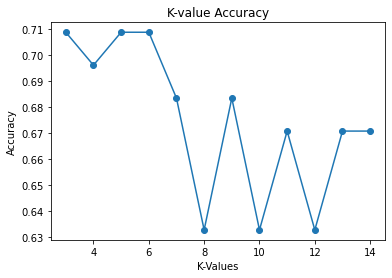

In [43]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('K-Values')
plt.ylabel('Accuracy')
plt.title('K-value Accuracy')
plt.show()

In [44]:
f1_score(y_test,y_predict)

0.7936507936507937

In [45]:
confusion_matrix(y_test,y_predict)

array([[ 3, 24],
       [ 2, 50]], dtype=int64)

In [46]:
print("Accuracy is: ",accuracy_score(y_test,y_predict))
print("Precision is: ",precision_score(y_test,y_predict))
print("Recall is: ",recall_score(y_test,y_predict))
print("f1 score is: ",f1_score(y_test,y_predict))

Accuracy is:  0.6708860759493671
Precision is:  0.6756756756756757
Recall is:  0.9615384615384616
f1 score is:  0.7936507936507937


Changing the K-Value as 5

In [47]:
classifier= KNeighborsClassifier(n_neighbors=5,metric='minkowski')
knn_model= classifier.fit(x_train,y_train)
y_predict= knn_model.predict(x_test)
f1_score(y_test,y_predict)

0.8188976377952756

In [48]:

confusion_matrix(y_test,y_predict)

array([[ 4, 23],
       [ 0, 52]], dtype=int64)

In [49]:
print("Accuracy is: ",accuracy_score(y_test,y_predict))
print("Precision is: ",precision_score(y_test,y_predict))
print("Recall is: ",recall_score(y_test,y_predict))
print("f1 score is: ",f1_score(y_test,y_predict))

Accuracy is:  0.7088607594936709
Precision is:  0.6933333333333334
Recall is:  1.0
f1 score is:  0.8188976377952756


# Decision tree

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt=  DecisionTreeClassifier()
dt_model=dt.fit(x_train,y_train)
y_predict =dt_model.predict(x_test)
f1_score(y_test,y_predict)

0.780952380952381

In [51]:
print("Accuracy is: ",accuracy_score(y_test,y_predict))
print("Precision is: ",precision_score(y_test,y_predict))
print("Recall is: ",recall_score(y_test,y_predict))
print("f1 score is: ",f1_score(y_test,y_predict))

Accuracy is:  0.7088607594936709
Precision is:  0.7735849056603774
Recall is:  0.7884615384615384
f1 score is:  0.780952380952381


In [52]:
confusion_matrix(y_test,y_predict)

array([[15, 12],
       [11, 41]], dtype=int64)

# Support Vector Machine

In [53]:
from sklearn.svm import SVC
svm=SVC(kernel='linear')
svm_model= svm.fit(x_train,y_train)
y_predict= svm_model.predict(x_test)

In [54]:
f1_score(y_test,y_predict)

0.8099173553719008

In [55]:
confusion_matrix(y_test,y_predict) 

array([[ 7, 20],
       [ 3, 49]], dtype=int64)

In [56]:
print("Accuracy is: ",accuracy_score(y_test,y_predict))
print("Precision is: ",precision_score(y_test,y_predict))
print("Recall is: ",recall_score(y_test,y_predict))
print("f1 score is: ",f1_score(y_test,y_predict))

Accuracy is:  0.7088607594936709
Precision is:  0.7101449275362319
Recall is:  0.9423076923076923
f1 score is:  0.8099173553719008


# Polynomial SVM

In [57]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_predict=svm_poly.predict(x_test)
print("Accuracy  is: ",accuracy_score(y_test,y_predict))
print("Precision is :",precision_score(y_test,y_predict))
print("Recall is :",recall_score(y_test,y_predict))
print("f1 score is :",f1_score(y_test,y_predict))

Accuracy  is:  0.6708860759493671
Precision is : 0.6756756756756757
Recall is : 0.9615384615384616
f1 score is : 0.7936507936507937


In [58]:
confusion_matrix(y_test,y_predict) 

array([[ 3, 24],
       [ 2, 50]], dtype=int64)

# Radial SVM

In [59]:
svm_radial = SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_predict=svm_radial.predict(x_test)
print("Accuracy  is: ",accuracy_score(y_test,y_predict))
print("Precision is :",precision_score(y_test,y_predict))
print("Recall is :",recall_score(y_test,y_predict))
print("f1 score is :",f1_score(y_test,y_predict))

Accuracy  is:  0.6582278481012658
Precision is : 0.6582278481012658
Recall is : 1.0
f1 score is : 0.7938931297709924


In [60]:
confusion_matrix(y_test,y_predict)

array([[ 0, 27],
       [ 0, 52]], dtype=int64)

# Conclusion

From these models we can select K-Nearest,Logistic regression,Support Vector Machine,RandomForest.